<a href="https://colab.research.google.com/github/Amzilynn/delivery_ML/blob/main/Projet_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Business Understanding**

  1.**Supervised**  

  **Problem Statement:**
  
  The current lack of a reliable delivery time estimate leads to poor customer experience. Customers become frustrated when their order is late, which results in increased customer service inquiries, negative reviews, and a higher risk of losing customers to competitors.


**BO (Business Objective):**
Improve the customer experience by providing an accurate estimate of delivery time.

**DSO (Data Science Objective):**
Build a regression model that predicts delivery duration (in minutes) based on order characteristics (size, restaurant category, time, delivery personnel availability, weather, accidents).


**Initial Suggested Model** : Regression Lineaire

**Evaluation Metrics** :


*   RMSE
*   MAE
*   R²

**Success Criteria :**

This project will be considered a success if the deployed model leads to a quantifiable business improvement. For instance, a measurable increase in the customer satisfaction score (Net Promoter Score) and it should also provide actionable insights that help the logistics team optimize delivery routes.

**Stakeholders :**

*   This project is crucial for the Logistics Manager, who can use the predictions to optimize delivery routes.
*   The Customer Service Team, who can use the estimates to manage customer expectations effectively.
*   The Marketing Department may also benefit from data on delivery efficiency.

2.**Unsupervised** :

**Problem Statement:**

The company receives a large number of customer orders daily, but there is no systematic analysis of order profiles. Without understanding order patterns, it is difficult to identify consumption habits and optimize marketing strategies.


**Bo (Business Objective):**
Understand customer consumption habits by analyzing order profiles, identifying characteristics in timing, items, and spending to improve marketing and operations.


**DSo (Data Science Objective):**
Cluster orders based on key patterns  (items, value, time, category,protocol) to uncover natural segments and support data-driven insights.


**Initial Suggesgted Model :** K-means


**Evaluation Metrics :**


*  High Silhouette Score

*  Low Davies-Bouldin Index


**Success Criteria :**

* Each cluster represents a clear consumption profile (e.g., high-value evening orders, quick lunchtime orders, price-sensitive customers)


* Insights from the clusters can be directly used to guide business actions (targeted marketing, personalized offers, optimized scheduling).


**Stakeholders :**

* Marketing team → uses insights to design targeted campaigns.

* Sales team → aligns offers with customer order habits.

* Data science team → develops and validates clustering models.

* Management → leverages insights for strategic decision-making.


# **II. Data Understanding**

## **Importing librairies**

Importing libraries is essential because it provides access to pre-existing functions, methods, and tools, making data analysis easier.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **II.1. Data Loading**

This allows us to access the raw data and begin exploring its structure, missing values, and data types.

In [ ]:
df = pd.read_csv("/content/datadelevry.csv")
print(f" Successfully loaded CSV: {df.shape[0]} rows, {df.shape[1]} columns")


 Successfully loaded CSV: 24575 rows, 14 columns


## **II.2. Dataset Overview**

This step helps to quickly understand the structure and content of the dataset.

#### Basic information about the dataset

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,NaN,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,NaN,1600.0,6.0,6.0,9.0


In [ ]:
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
24570,2.0,2015-02-15 20:40:23,2015-02-15 21:20:11,6896521bf2c62949dbdfa65176cc45f9,burger,3.0,1.0,1050.0,1.0,1000.0,1000.0,59.0,56.0,84.0
24571,2.0,2015-02-04 03:00:44,2015-02-04 03:31:11,6896521bf2c62949dbdfa65176cc45f9,burger,3.0,4.0,2798.0,4.0,320.0,1000.0,107.0,92.0,136.0
24572,2.0,2015-02-15 02:47:27,2015-02-15 03:26:48,6896521bf2c62949dbdfa65176cc45f9,burger,NaN,2.0,1558.0,2.0,349.0,779.0,124.0,115.0,197.0
24573,2.0,2015-02-12 02:04:56,2015-02-12 02:31:12,6896521bf2c62949dbdfa65176cc45f9,burger,3.0,3.0,1117.0,3.0,189.0,599.0,113.0,104.0,134.0
24574,2.0,2015-02-13 01:10:39,2015-02-13 01:42:55,6896521bf2c62949dbdfa65176cc45f9,burger,3.0,3.0,1078.0,3.0,229.0,429.0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24575 entries, 0 to 24574
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   market_id                 23954 non-null  float64
 1   created_at                24073 non-null  object 
 2   actual_delivery_time      24110 non-null  object 
 3   store_id                  24091 non-null  object 
 4   store_primary_category    23426 non-null  object 
 5   order_protocol            23971 non-null  float64
 6   total_items               24088 non-null  float64
 7   subtotal                  24115 non-null  float64
 8   num_distinct_items        24056 non-null  float64
 9   min_item_price            24079 non-null  float64
 10  max_item_price            24078 non-null  float64
 11  total_onshift_partners    22315 non-null  float64
 12  total_busy_partners       22331 non-null  float64
 13  total_outstanding_orders  22342 non-null  float64
dtypes: flo

In [ ]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,23954.000000,23971.000000,24088.000000,24115.000000,24056.000000,24079.000000,24078.000000,22315.000000,22331.000000,22342.000000
mean,2.916214,2.769346,3.340045,2712.459672,2.760808,660.310353,1162.647354,44.298499,41.450092,57.851983
std,1.494180,1.483179,2.715359,1849.410517,1.677088,525.187951,577.011662,34.692593,32.367294,53.134073
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-2.000000,-1.000000,-2.000000
25%,2.000000,1.000000,2.000000,1420.000000,2.000000,275.000000,799.000000,16.000000,14.000000,16.000000
50%,3.000000,3.000000,3.000000,2236.000000,2.000000,550.000000,1095.000000,36.000000,34.000000,40.000000
75%,4.000000,4.000000,4.000000,3450.000000,4.000000,899.000000,1400.000000,65.000000,62.000000,85.000000
max,6.000000,6.000000,57.000000,18370.000000,20.000000,7475.000000,8500.000000,171.000000,153.000000,285.000000


In [ ]:
df.dtypes

,0
market_id,float64
created_at,object
actual_delivery_time,object
store_id,object
store_primary_category,object
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


## **II.3. Missing Values Analysis**

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df = pd.DataFrame({
        'Column': df.columns,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Missing_%': (df.isnull().sum() / len(df) * 100).round(2)
    })
print(info_df.to_string(index=False))


                  Column  Non_Null_Count  Null_Count  Missing_%
               market_id           15700           0        0.0
              created_at           15700           0        0.0
    actual_delivery_time           15700           0        0.0
                store_id           15700           0        0.0
  store_primary_category           15700           0        0.0
          order_protocol           15700           0        0.0
             total_items           15700           0        0.0
                subtotal           15700           0        0.0
      num_distinct_items           15700           0        0.0
          min_item_price           15700           0        0.0
          max_item_price           15700           0        0.0
  total_onshift_partners           15700           0        0.0
     total_busy_partners           15700           0        0.0
total_outstanding_orders           15700           0        0.0


## **II.4. Categorical Variables Analysis**

This step focuses on analyzing categorical columns in the dataset. We first identify columns with object or category data types.

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
  print("CATEGORICAL COLUMNS SUMMARY:")
  for col in categorical_cols:
      unique_count = df[col].nunique()
      print(f"{col}: {unique_count} unique values")
      if unique_count <= 10:
         print(f"   Values: {df[col].value_counts().head().to_dict()}")
      else:
         print(f"   Top 5: {df[col].value_counts().head().to_dict()}")
      print()

CATEGORICAL COLUMNS SUMMARY:
created_at: 23812 unique values
   Top 5: {'2015-02-11 19:50:20': 3, '2015-02-11 19:51:12': 3, '2015-02-02 02:35:22': 2, '2015-02-07 03:27:03': 2, '2015-02-16 02:02:11': 2}

actual_delivery_time: 23765 unique values
   Top 5: {'2015-02-11 20:46:22': 3, '2015-02-08 03:58:34': 3, '2015-02-11 21:01:32': 3, '2015-02-05 03:56:23': 3, '2015-02-04 03:15:23': 3}

store_id: 922 unique values
   Top 5: {'d43ab110ab2489d6b9b2caa394bf920f': 529, 'f7177163c833dff4b38fc8d2872f1ec6': 523, '149e9677a5989fd342ae44213df68868': 425, '9854d7afce413aa13cd0a1d39d0bcec5': 357, '757b505cfd34c64c85ca5b5690ee5293': 310}

store_primary_category: 61 unique values
   Top 5: {'american': 2681, 'pizza': 1851, 'mexican': 1824, 'chinese': 1427, 'indian': 1338}



## **II.5. Duplicate Analysis**

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df)*100):.2f}%")
print()


Number of duplicate rows: 0



## **II.6. Data Visualization**

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

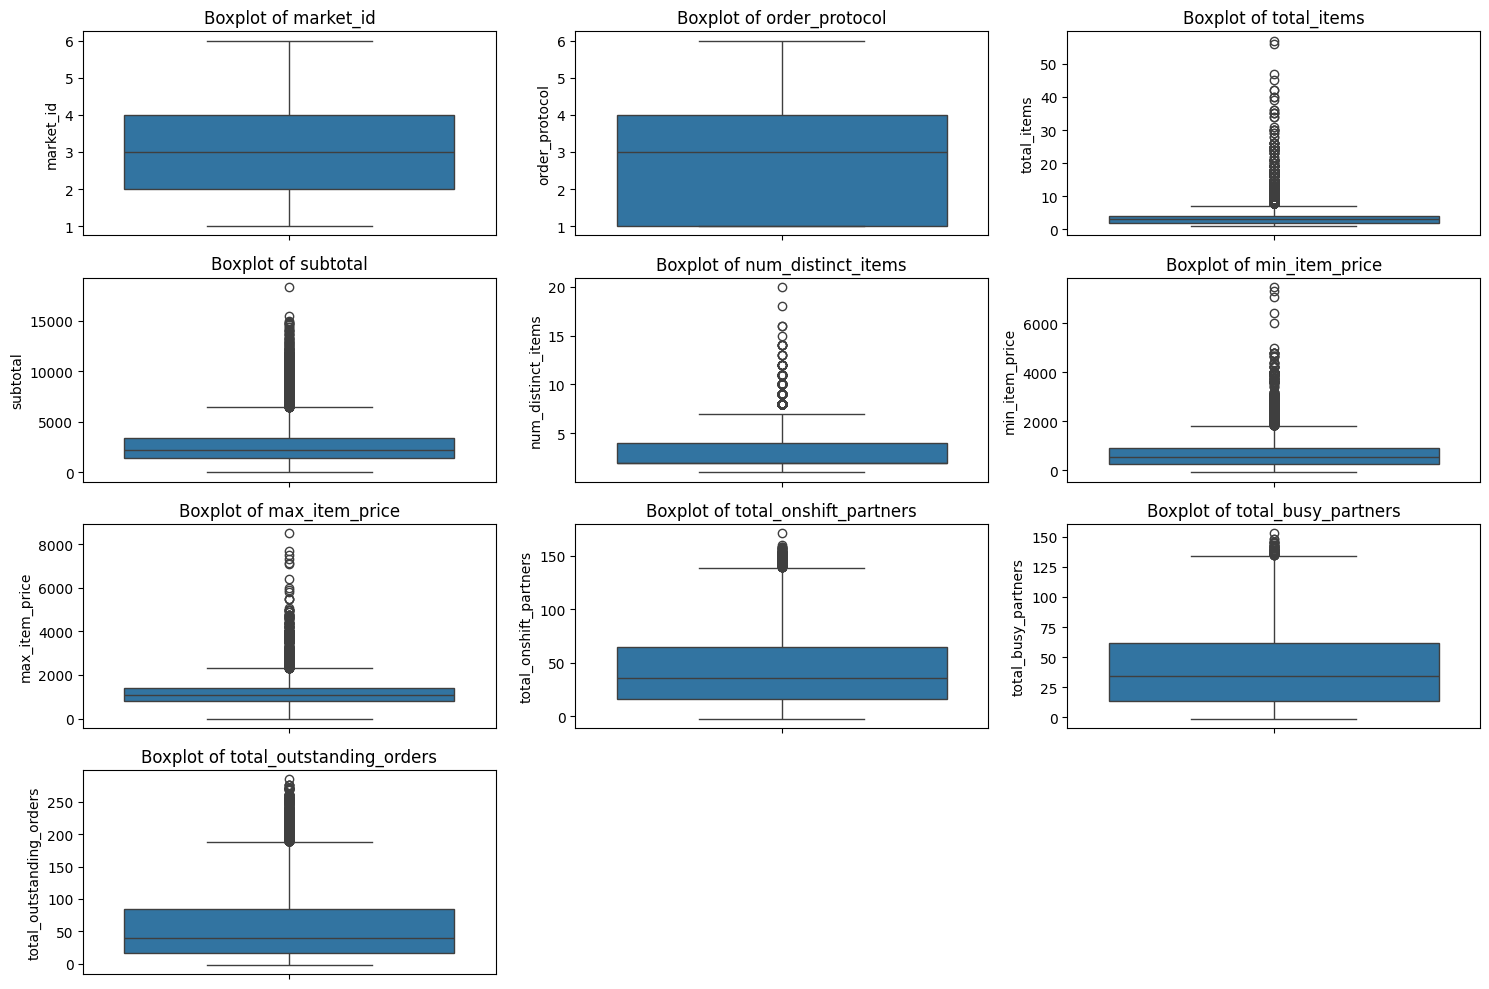

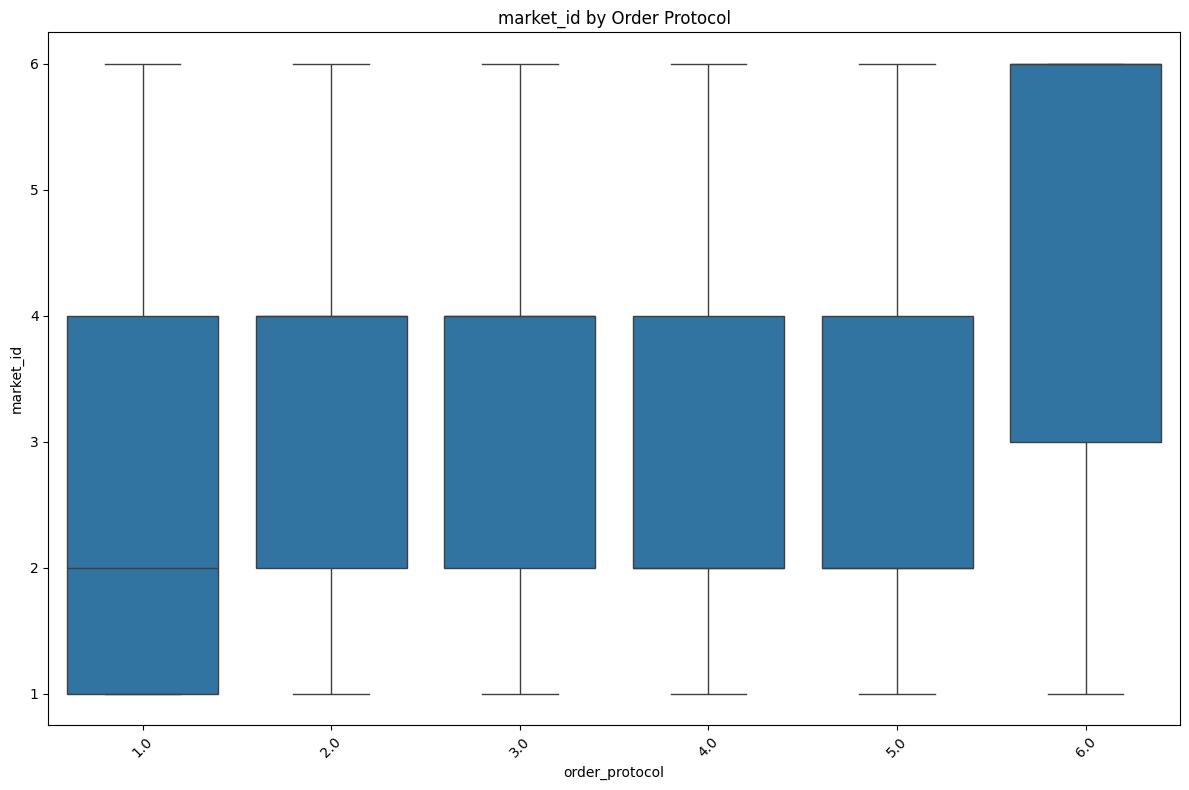

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    # Create a new subplot for each column
    # Adjust the grid size based on number of columns
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.savefig('boxplots_numerical.png')
plt.show()

if 'order_protocol' in df.columns and len(numerical_cols) > 0:
    plt.figure(figsize=(12, 8))
    # Select first numerical column as an example
    numerical_col = numerical_cols[0]
    sns.boxplot(x='order_protocol', y=numerical_col, data=df)
    plt.title(f'{numerical_col} by Order Protocol')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplot_by_category.png')
    plt.show()

**# Categorical data visualization**

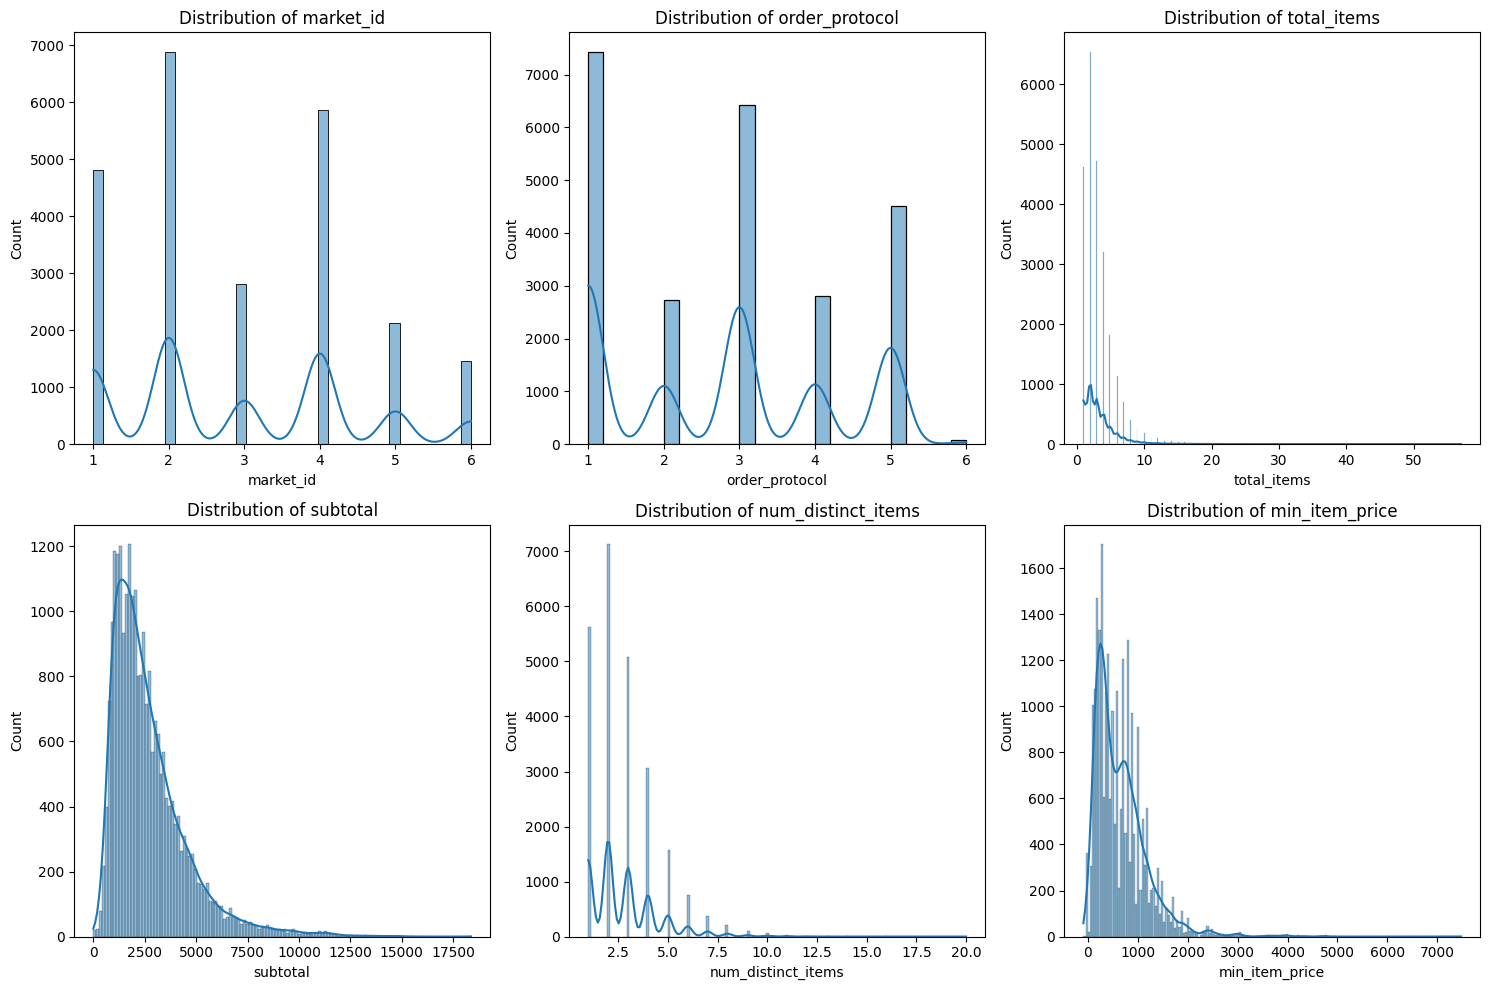

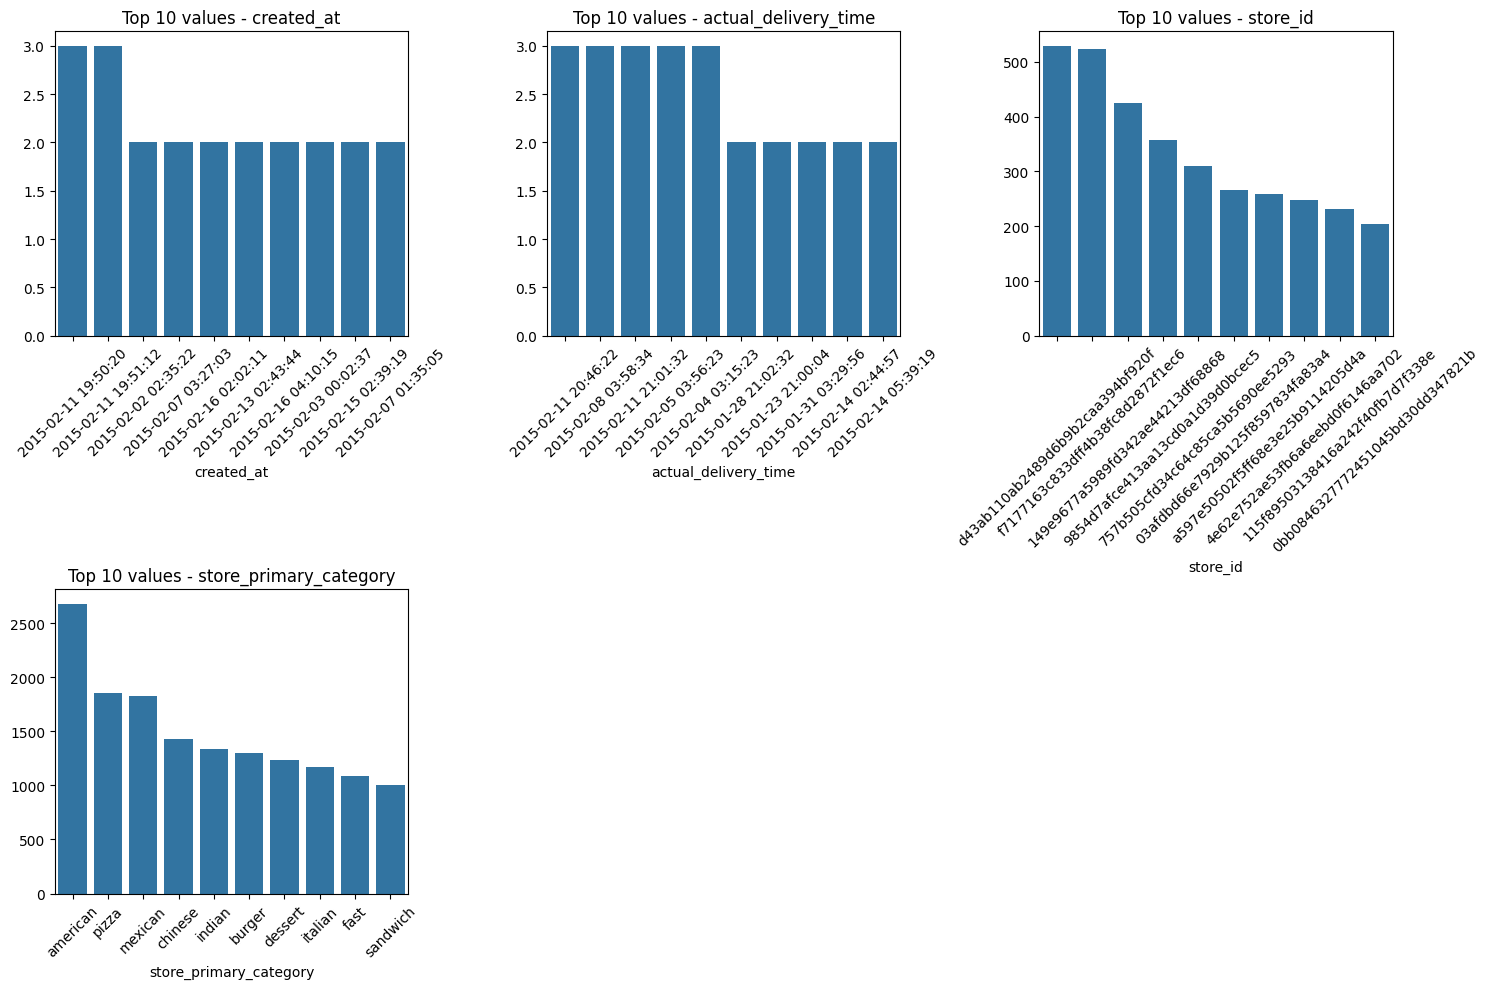

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, define numerical_cols before using it
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Now use numerical_cols in your visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:min(6, len(numerical_cols))], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

# Visualize categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols[:min(6, len(categorical_cols))], 1):
        plt.subplot(2, 3, i)
        top_categories = df[col].value_counts().head(10)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Top 10 values - {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('categorical_distributions.png')
    plt.show()


# **III. Data Preparation**


## III.1. Data Cleaning

Data cleaning involves preparing the dataset for analysis by addressing issues that could affect results. This includes:
- Duplicate removal: Eliminating repeated rows to ensure data integrity.
- Outlier detection and removal: Identifying and handling extreme values that may distort analysis.
- Missing value imputation: Filling or handling missing values to maintain data completeness and accuracy."

### A - Duplicate Removal

In [ ]:
df.drop_duplicates(inplace=True)
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


### B - Outlier Detection and Removal

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Tu peux le faire en boucle pour plusieurs colonnes :
cols = ["subtotal", "total_items", "num_distinct_items", "total_onshift_partners", "total_busy_partners", "total_outstanding_orders",
        "min_item_price", "max_item_price","order_protocol"]

for col in cols:
    df = remove_outliers_iqr(df, col)


Visualisation des colonnes numériques avec boxplots

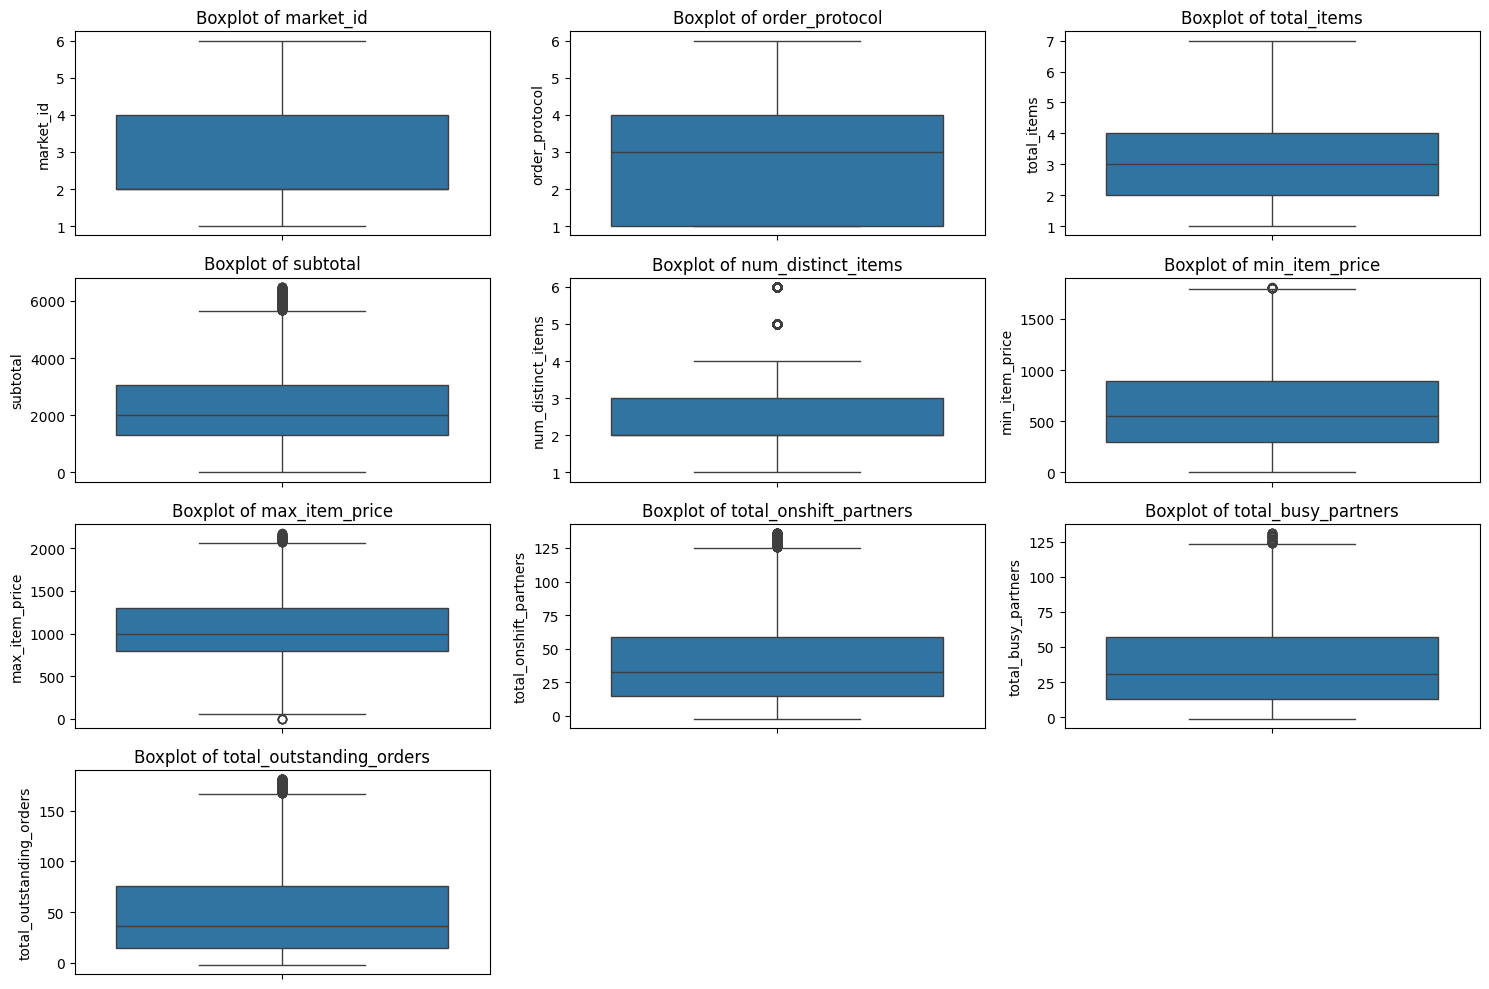

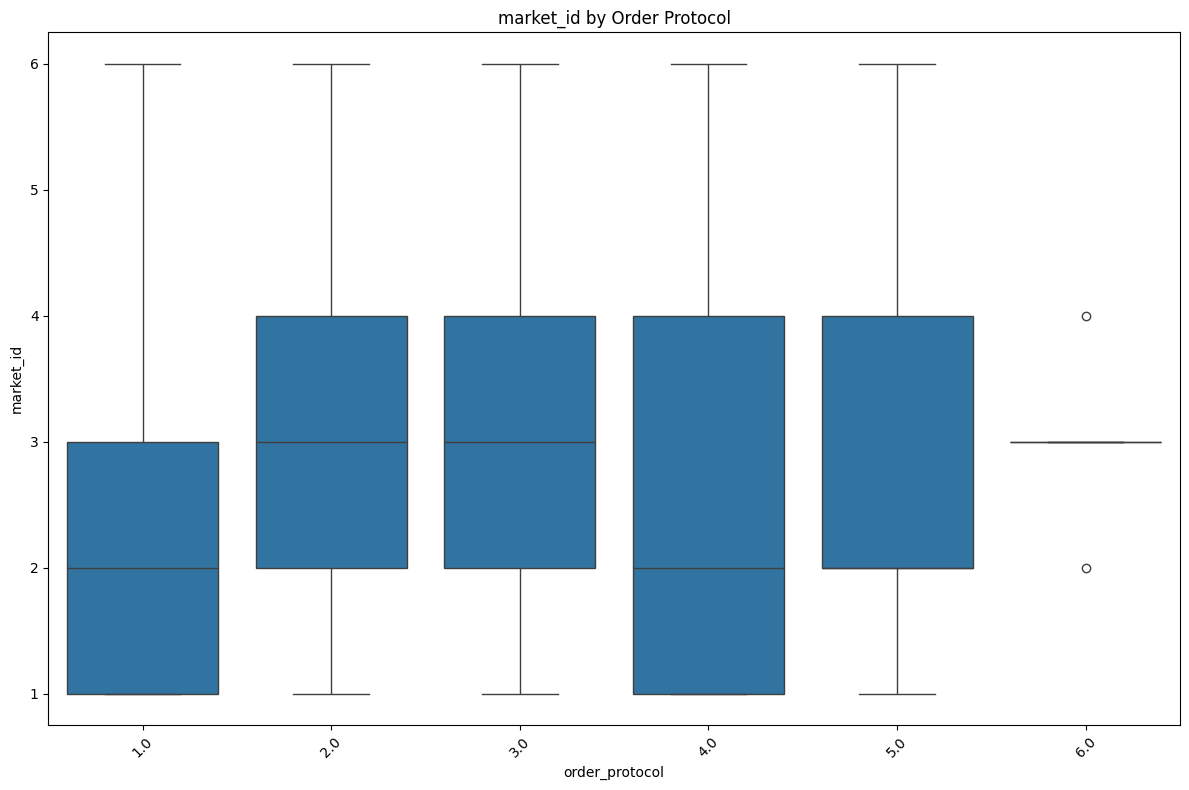

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    # Create a new subplot for each column
    # Adjust the grid size based on number of columns
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.savefig('boxplots_numerical2.png')
plt.show()

if 'order_protocol' in df.columns and len(numerical_cols) > 0:
    plt.figure(figsize=(12, 8))
    # Select first numerical column as an example
    numerical_col = numerical_cols[0]
    sns.boxplot(x='order_protocol', y=numerical_col, data=df)
    plt.title(f'{numerical_col} by Order Protocol')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplot_by_category2.png')
    plt.show()

### C - Missing Value Imputation

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

print("\n=== Handling Missing Values ===")

# --- 1. Convert datetime columns ---
datetime_cols = ['created_at', 'actual_delivery_time']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# --- 2. Handle categorical-like columns ---
categorical_cols = ['store_primary_category', 'market_id', 'store_id']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')  # fill missing IDs and categories with 'Unknown'

# Handle order_protocol (numeric but categorical)
if 'order_protocol' in df.columns:
    df['order_protocol'] = df['order_protocol'].astype('Int64').astype(str)
    df['order_protocol'] = df['order_protocol'].replace('<NA>', 'Unknown')

# --- 3. Handle price-related missing values ---
price_cols = ['subtotal', 'min_item_price', 'max_item_price']
for col in price_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- 4. Handle operational columns ---
operational_cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for col in operational_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- 5. Handle item count columns ---
item_cols = ['total_items', 'num_distinct_items']
for col in item_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# --- 6. Handle datetime missing values
df['created_at'] = df['created_at'].fillna(df['created_at'].median())
df['actual_delivery_time'] = df['actual_delivery_time'].fillna(df['actual_delivery_time'].median())

print("Missing values after imputation:")
print(df.isnull().sum())



=== Handling Missing Values ===
Missing values after imputation:
market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


In [ ]:
df.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


## III.2. Feature Selection

### (1): Feature Engineering - Time Features

In [ ]:
def create_time_features(df):
        print("\n=== Creating Time Features ===")

        df_time = df.copy()

        if 'created_at' in df_time.columns:
            # Basic time components
            df_time['order_hour'] = df_time['created_at'].dt.hour
            df_time['order_day_of_week'] = df_time['created_at'].dt.dayofweek
            df_time['order_month'] = df_time['created_at'].dt.month
            df_time['order_day_of_month'] = df_time['created_at'].dt.day

            # Time period categories
            df_time['time_period'] = pd.cut(df_time['order_hour'],
                                          bins=[0, 6, 11, 14, 18, 21, 24],
                                          labels=['Late Night', 'Morning', 'Lunch', 'Afternoon', 'Dinner', 'Evening'])

            # Weekend indicator
            df_time['is_weekend'] = (df_time['order_day_of_week'] >= 5).astype(int)

            # Peak hours
            df_time['is_lunch_peak'] = ((df_time['order_hour'] >= 11) & (df_time['order_hour'] <= 14)).astype(int)
            df_time['is_dinner_peak'] = ((df_time['order_hour'] >= 18) & (df_time['order_hour'] <= 21)).astype(int)

        # Calculate delivery duration
        if 'created_at' in df_time.columns and 'actual_delivery_time' in df_time.columns:
            df_time['delivery_duration_minutes'] = (
                df_time['actual_delivery_time'] - df_time['created_at']
            ).dt.total_seconds() / 60

            # Delivery speed categories
            df_time['delivery_speed'] = pd.cut(df_time['delivery_duration_minutes'],
                                             bins=[0, 30, 60, 90, float('inf')],
                                             labels=['Fast', 'Normal', 'Slow', 'Very Slow'])

        return df_time

df_time = create_time_features(df)

df_time.columns


=== Creating Time Features ===


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed'],
      dtype='object')

In [ ]:
df_time.head(1)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,order_hour,order_day_of_week,order_month,order_day_of_month,time_period,is_weekend,is_lunch_peak,is_dinner_peak,delivery_duration_minutes,delivery_speed
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,21,1,2,10,Dinner,0,0,1,67.066667,Slow


### (2): Order-related Features

In [ ]:
import numpy as np
def create_order_features(df):
        print("\n=== Creating Order Features ===")

        df_orders = df_time.copy()

        # Price-based features
        if 'subtotal' in df_orders.columns and 'total_items' in df_orders.columns:
            # Avoid division by zero
            df_orders['avg_item_price'] = df_orders['subtotal'] / df_orders['total_items'].replace(0, np.nan)

        if 'subtotal' in df_orders.columns and 'num_distinct_items' in df_orders.columns:
            df_orders['price_per_distinct_item'] = df_orders['subtotal'] / df_orders['num_distinct_items'].replace(0, np.nan)

        if 'num_distinct_items' in df_orders.columns and 'total_items' in df_orders.columns:
            df_orders['item_diversity_ratio'] = df_orders['num_distinct_items'] / df_orders['total_items'].replace(0, np.nan)

        # Price range
        if 'max_item_price' in df_orders.columns and 'min_item_price' in df_orders.columns:
            df_orders['price_range'] = df_orders['max_item_price'] - df_orders['min_item_price']

        # Order size categories
        if 'total_items' in df_orders.columns:
            df_orders['order_size_category'] = pd.cut(df_orders['total_items'],
                                                    bins=[0, 2, 5, 10, float('inf')],
                                                    labels=['Small', 'Medium', 'Large', 'Extra Large'])

        # Order value categories (subtotal is float64)
        if 'subtotal' in df_orders.columns:
            # Use percentiles for more balanced categories
            subtotal_25 = df_orders['subtotal'].quantile(0.25)
            subtotal_50 = df_orders['subtotal'].quantile(0.50)
            subtotal_75 = df_orders['subtotal'].quantile(0.75)

            df_orders['order_value_category'] = pd.cut(df_orders['subtotal'],
                                                     bins=[0, subtotal_25, subtotal_50, subtotal_75, float('inf')],
                                                     labels=['Low', 'Medium', 'High', 'Premium'])



        return df_orders
df_orders = create_order_features(df_time)
df_orders.columns




=== Creating Order Features ===


Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed', 'avg_item_price', 'price_per_distinct_item',
       'item_diversity_ratio', 'price_range', 'order_size_category',
       'order_value_category'],
      dtype='object')

Sélection des catégories principales (Top-K)

In [ ]:
TOPK = 5  # keep top 20 categories
topk = df_orders['store_primary_category'].value_counts().nlargest(TOPK).index
df_orders['store_cat_topk'] = df_orders['store_primary_category'].where(
    df_orders['store_primary_category'].isin(topk),
    other='other'
)


In [ ]:
df_orders.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,is_dinner_peak,delivery_duration_minutes,delivery_speed,avg_item_price,price_per_distinct_item,item_diversity_ratio,price_range,order_size_category,order_value_category,store_cat_topk
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,1,67.066667,Slow,1900.000000,1900.000000,1.0,0.0,Small,Medium,mexican
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,1,29.683333,Fast,1900.000000,1900.000000,1.0,0.0,Small,Medium,other
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,1,38.333333,Normal,1666.666667,1666.666667,1.0,400.0,Medium,Premium,other
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,0,32.750000,Normal,1212.500000,1212.500000,1.0,1050.0,Medium,Premium,other
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,0,53.200000,Normal,1050.000000,1050.000000,1.0,500.0,Small,High,other
10,3.0,2015-02-02 19:22:53,2015-02-02 20:09:19,f0ade77b43923b38237db569b016ba25,Unknown,4,4.0,4300.0,4.0,1200.0,...,1,46.433333,Normal,1075.000000,1075.000000,1.0,300.0,Medium,Premium,other
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1,1.0,1525.0,1.0,1525.0,...,0,37.883333,Normal,1525.000000,1525.000000,1.0,0.0,Small,Medium,other
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4475.0,3.0,925.0,...,0,87.783333,Slow,1491.666667,1491.666667,1.0,900.0,Medium,Premium,other
17,1.0,2015-02-08 02:04:17,2015-02-08 03:27:13,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4375.0,3.0,1325.0,...,0,82.933333,Slow,1458.333333,1458.333333,1.0,300.0,Medium,Premium,other
19,1.0,2015-01-31 02:21:23,2015-01-31 03:11:42,ce016f59ecc2366a43e1c96a4774d167,mexican,1,2.0,950.0,2.0,150.0,...,0,50.316667,Normal,475.000000,475.000000,1.0,550.0,Small,Low,mexican


In [ ]:
df_orders.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed', 'avg_item_price', 'price_per_distinct_item',
       'item_diversity_ratio', 'price_range', 'order_size_category',
       'order_value_category', 'store_cat_topk'],
      dtype='object')

In [ ]:
df_orders.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


Ratios & niveaux d'activité magasin

In [ ]:
df_orders['congestion_ratio'] = df_orders['total_busy_partners'] / (df_orders['total_onshift_partners'] + 1e-6)
df_orders['saturation_ratio'] = df_orders['total_outstanding_orders'] / (df_orders['total_onshift_partners'] + 1e-6)


In [ ]:
df_orders.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,delivery_speed,avg_item_price,price_per_distinct_item,item_diversity_ratio,price_range,order_size_category,order_value_category,store_cat_topk,congestion_ratio,saturation_ratio
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,Slow,1900.000000,1900.000000,1.0,0.0,Small,Medium,mexican,1.999998,1.999998
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,Fast,1900.000000,1900.000000,1.0,0.0,Small,Medium,other,0.000000,0.000000
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,Normal,1666.666667,1666.666667,1.0,400.0,Medium,Premium,other,1.000000,1.000000
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,Normal,1212.500000,1212.500000,1.0,1050.0,Medium,Premium,other,1.142857,1.000000
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,Normal,1050.000000,1050.000000,1.0,500.0,Small,High,other,1.000000,1.000000


In [ ]:
# Drop existing columns if they exist to avoid the error on re-running the cell
if 'store_order_count' in df_orders.columns:
    df_orders = df_orders.drop('store_order_count', axis=1)
if 'store_activity_level' in df_orders.columns:
    df_orders = df_orders.drop('store_activity_level', axis=1)

store_order_counts = df_orders.groupby('store_id').size().rename('store_order_count')
df_orders = df_orders.join(store_order_counts, on='store_id')

# Optional: store activity level
df_orders['store_activity_level'] = pd.cut(df_orders['store_order_count'],
                                    bins=[0, 50, 200, float('inf')],
                                    labels=['low', 'medium', 'high'])



In [ ]:
df_orders.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,price_per_distinct_item,item_diversity_ratio,price_range,order_size_category,order_value_category,store_cat_topk,congestion_ratio,saturation_ratio,store_order_count,store_activity_level
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,1900.000000,1.0,0.0,Small,Medium,mexican,1.999998,1.999998,6,low
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,1900.000000,1.0,0.0,Small,Medium,other,0.000000,0.000000,6,low
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,1666.666667,1.0,400.0,Medium,Premium,other,1.000000,1.000000,6,low
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,1212.500000,1.0,1050.0,Medium,Premium,other,1.142857,1.000000,6,low
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,1050.000000,1.0,500.0,Small,High,other,1.000000,1.000000,6,low
10,3.0,2015-02-02 19:22:53,2015-02-02 20:09:19,f0ade77b43923b38237db569b016ba25,Unknown,4,4.0,4300.0,4.0,1200.0,...,1075.000000,1.0,300.0,Medium,Premium,other,0.999999,0.999999,6,low
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1,1.0,1525.0,1.0,1525.0,...,1525.000000,1.0,0.0,Small,Medium,other,1.200000,1.600000,3,low
16,1.0,2015-02-06 00:42:42,2015-02-06 02:10:29,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4475.0,3.0,925.0,...,1491.666667,1.0,900.0,Medium,Premium,other,0.250000,0.250000,3,low
17,1.0,2015-02-08 02:04:17,2015-02-08 03:27:13,ef1e491a766ce3127556063d49bc2f98,italian,1,3.0,4375.0,3.0,1325.0,...,1458.333333,1.0,300.0,Medium,Premium,other,0.666667,0.500000,3,low
19,1.0,2015-01-31 02:21:23,2015-01-31 03:11:42,ce016f59ecc2366a43e1c96a4774d167,mexican,1,2.0,950.0,2.0,150.0,...,475.000000,1.0,550.0,Small,Low,mexican,1.000000,1.083333,2,low



### A. Categorical Features
#### (1): Ordinal Encoding (dicuss)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = [
    'store_primary_category',
    'order_protocol',
    'delivery_speed',
    'order_size_category',
    'order_value_category',
    'store_cat_topk',
    'store_activity_level',
    'time_period'
]

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df_orders[categorical_cols])

# Add encoded columns with new names
for i, col in enumerate(categorical_cols):
    df_orders[col + '_encoded'] = encoded_data[:, i]


In [ ]:
df_orders.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


Création d'indicateurs de performance du magasin et des partenaires

In [ ]:
df_orders['store_avg_delivery_duration'] = df_orders.groupby('store_id')['delivery_duration_minutes'].transform('mean')

In [ ]:
df_orders['idle_partner_ratio'] = (
    (df_orders['total_onshift_partners'] - df_orders['total_busy_partners']) /
    (df_orders['total_onshift_partners'] + 1e-6)
)

In [ ]:
df_orders.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


### (4): External Data Integration

#### Weather Features Integration

In [ ]:
import pandas as pd
import requests

# --- Copy orders dataset ---
df_weather = df_orders.copy()

# Ensure 'created_at' is datetime
df_weather['created_at'] = pd.to_datetime(df_weather['created_at'])

# Extract time only (HH:MM:SS) from created_at
df_weather['time'] = df_weather['created_at'].dt.time

# Check result
print(df_weather[['created_at', 'time']].head())


# --- Extract order date for daily weather ---
df_weather['order_date'] = df_weather['created_at'].dt.floor('d')  # datetime64[ns]

# --- Open-Meteo API parameters for New Delhi (daily) ---
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": 28.6139,
    "longitude": 77.2090,
    "start_date": df_weather["order_date"].min().strftime("%Y-%m-%d"),
    "end_date": df_weather["order_date"].max().strftime("%Y-%m-%d"),
    "daily": ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"],
    "timezone": "Asia/Kolkata"
}

# --- Fetch weather data ---
response = requests.get(url, params=params)
weather_data = response.json()

if 'daily' in weather_data:
    # Convert weather data to DataFrame
    weather_df = pd.DataFrame(weather_data["daily"])
    weather_df["time"] = pd.to_datetime(weather_df["time"])  # datetime64[ns]

    # Rename weather columns for clarity
    weather_df = weather_df.rename(columns={
        "temperature_2m_max": "weather_temp_max",
        "temperature_2m_min": "weather_temp_min",
        "precipitation_sum": "weather_precipitation"
    })

    # --- Merge orders with daily weather ---
    df_weather = df_weather.merge(weather_df, left_on="order_date", right_on="time", how="left")

    # Optionally, drop the duplicate 'time' column from weather API
    df_weather = df_weather.drop(columns=["time_y"])
    df_weather = df_weather.rename(columns={"time_x": "time"})

    print("Daily weather merged successfully!")

else:
    print(f"Error fetching weather data: {weather_data.get('reason', 'Unknown error')}")

# --- Check result ---
print(df_weather[['created_at', 'time', 'order_date', 'weather_temp_max', 'weather_temp_min', 'weather_precipitation']].head())


           created_at      time
1 2015-02-10 21:49:25  21:49:25
2 2015-01-22 20:39:28  20:39:28
5 2015-01-28 20:30:38  20:30:38
7 2015-02-12 03:03:35  03:03:35
9 2015-02-18 01:15:45  01:15:45
Daily weather merged successfully!
           created_at      time order_date  weather_temp_max  \
0 2015-02-10 21:49:25  21:49:25 2015-02-10              22.1   
1 2015-01-22 20:39:28  20:39:28 2015-01-22              15.6   
2 2015-01-28 20:30:38  20:30:38 2015-01-28              17.2   
3 2015-02-12 03:03:35  03:03:35 2015-02-12              22.1   
4 2015-02-18 01:15:45  01:15:45 2015-02-18              26.1   

   weather_temp_min  weather_precipitation  
0               9.5                    0.0  
1              11.2                   17.0  
2               6.9                    0.0  
3               8.6                    0.0  
4              15.6                   12.0  


In [ ]:
df_weather.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,store_cat_topk_encoded,store_activity_level_encoded,time_period_encoded,store_avg_delivery_duration,idle_partner_ratio,time,order_date,weather_temp_max,weather_temp_min,weather_precipitation
0,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2,1.0,1900.0,1.0,1400.0,...,2.0,1.0,1.0,44.577778,-0.999999,21:49:25,2015-02-10,22.1,9.5,0.0
1,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,Unknown,1,1.0,1900.0,1.0,1900.0,...,3.0,1.0,1.0,44.577778,0.999999,20:39:28,2015-01-22,15.6,11.2,17.0
2,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,Unknown,1,3.0,5000.0,3.0,1500.0,...,3.0,1.0,1.0,44.577778,0.000000,20:30:38,2015-01-28,17.2,6.9,0.0
3,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,f0ade77b43923b38237db569b016ba25,Unknown,1,4.0,4850.0,4.0,750.0,...,3.0,1.0,3.0,44.577778,-0.142857,03:03:35,2015-02-12,22.1,8.6,0.0
4,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,f0ade77b43923b38237db569b016ba25,Unknown,1,2.0,2100.0,2.0,700.0,...,3.0,1.0,3.0,44.577778,0.000000,01:15:45,2015-02-18,26.1,15.6,12.0


In [ ]:
df_weather.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed', 'avg_item_price', 'price_per_distinct_item',
       'item_diversity_ratio', 'price_range', 'order_size_category',
       'order_value_category', 'store_cat_topk', 'congestion_ratio',
       'saturation_ratio', 'store_order_count', 'store_activity_level',
       'store_primary_category_encoded', 'order_protocol_encoded',
       'delivery_speed_encoded', 'order_size_category_encoded',
       'order_value_category_encoded', 'store_cat_topk_encoded',
       'store_activity_level_encoded', 't

### (4): Geographic Features Creation

In [ ]:
import numpy as np

# Central point: Connaught Place, New Delhi
base_lat, base_lon = 28.6139, 77.2090

# Spread radius: ~0.05 degrees ≈ 5 km variation
def generate_diverse_coordinates(base_lat, base_lon, n, spread=0.05):
    lat_offsets = np.random.uniform(-spread, spread, n)
    lon_offsets = np.random.uniform(-spread, spread, n)
    return base_lat + lat_offsets, base_lon + lon_offsets

# Number of rows
n_rows = len(df_weather)

# Generate pickup (store) locations
df_weather['from_latitude'], df_weather['from_longitude'] = generate_diverse_coordinates(base_lat, base_lon, n_rows)

# Generate dropoff (customer) locations — add more variation to simulate real delivery range
df_weather['to_latitude'], df_weather['to_longitude'] = generate_diverse_coordinates(base_lat, base_lon, n_rows, spread=0.08)


In [ ]:
df_weather.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,idle_partner_ratio,time,order_date,weather_temp_max,weather_temp_min,weather_precipitation,from_latitude,from_longitude,to_latitude,to_longitude
111028,4.0,2015-02-16 01:30:37,2015-02-16 02:16:35,c20ad4d76fe97759aa27a0c99bff6710,vietnamese,5,2.0,1670.0,2.0,795.0,...,0.052632,01:30:37,2015-02-16,26.2,13.9,0.0,28.612822,77.218115,28.594069,77.198947
111029,4.0,2015-02-17 01:41:54,2015-02-17 02:15:48,c20ad4d76fe97759aa27a0c99bff6710,vietnamese,5,3.0,1230.0,3.0,185.0,...,0.043956,01:41:54,2015-02-17,26.5,15.8,1.6,28.564262,77.210626,28.655597,77.223810
111030,4.0,2015-02-06 04:14:47,2015-02-06 04:53:36,c20ad4d76fe97759aa27a0c99bff6710,vietnamese,5,4.0,2495.0,3.0,375.0,...,0.232558,04:14:47,2015-02-06,20.7,7.1,0.0,28.646238,77.176755,28.536210,77.234910
111031,4.0,2015-02-12 20:28:26,2015-02-12 21:23:16,c20ad4d76fe97759aa27a0c99bff6710,vietnamese,5,1.0,795.0,1.0,795.0,...,0.055556,20:28:26,2015-02-12,22.1,8.6,0.0,28.648732,77.203260,28.552953,77.278338
111032,1.0,2015-02-04 02:32:26,2015-02-04 03:05:37,c20ad4d76fe97759aa27a0c99bff6710,mexican,5,2.0,2170.0,2.0,795.0,...,0.108108,02:32:26,2015-02-04,19.9,10.0,0.0,28.606741,77.188286,28.606411,77.175537


In [ ]:
df_weather.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,object
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64


### (4): Traffic Pattern Analysis

In [ ]:
def traffic_index(order_hour, order_day_of_week):
    # Weekdays
    if order_day_of_week < 5:  # Monday–Friday
        if 7 <= order_hour <= 9 or 16 <= order_hour <= 19:
            return 3  # heavy traffic
        elif 10 <= order_hour <= 15:
            return 2  # moderate traffic
        else:
            return 1  # light traffic
    # Weekends
    else:  # Saturday-Sunday
        if 12 <= order_hour <= 14:
            return 2  # moderate (shopping lunch time)
        else:
            return 1  # light


Application et transformation

In [ ]:
df_weather['traffic_score'] = df_weather.apply(
    lambda row: traffic_index(row['order_hour'], row['order_day_of_week']),
    axis=1
)


In [ ]:
df_weather[['created_at', 'order_hour', 'order_day_of_week', 'traffic_score']].head(10)

,created_at,order_hour,order_day_of_week,traffic_score
0,2015-02-10 21:49:25,21,1,1
1,2015-01-22 20:39:28,20,3,1
2,2015-01-28 20:30:38,20,2,1
3,2015-02-12 03:03:35,3,3,1
4,2015-02-18 01:15:45,1,2,1
5,2015-02-02 19:22:53,19,0,3
6,2015-02-12 03:36:46,3,3,1
7,2015-02-06 00:42:42,0,4,1
8,2015-02-08 02:04:17,2,6,1
9,2015-01-31 02:21:23,2,5,1


In [ ]:
df_weather['traffic_category'] = df_weather['traffic_score'].map({1:'light',2:'moderate',3:'heavy'})

In [ ]:
df_weather[['created_at', 'order_hour', 'order_day_of_week', 'traffic_score', 'traffic_category']].head(10)

,created_at,order_hour,order_day_of_week,traffic_score,traffic_category
0,2015-02-10 21:49:25,21,1,1,light
1,2015-01-22 20:39:28,20,3,1,light
2,2015-01-28 20:30:38,20,2,1,light
3,2015-02-12 03:03:35,3,3,1,light
4,2015-02-18 01:15:45,1,2,1,light
5,2015-02-02 19:22:53,19,0,3,heavy
6,2015-02-12 03:36:46,3,3,1,light
7,2015-02-06 00:42:42,0,4,1,light
8,2015-02-08 02:04:17,2,6,1,light
9,2015-01-31 02:21:23,2,5,1,light


## III.3. Data Transformation

### B. Feature Scaling

#### Standardization (Standard Scaler)

Standard Scaler is used to normalize numerical features by removing the mean and scaling to unit variance.

##### **⚠️ df_scaled is for the first BO**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Colonnes à standardiser
cols_to_scale = [
    'total_items', 'subtotal', 'num_distinct_items',
    'min_item_price', 'max_item_price',
    'total_onshift_partners', 'total_busy_partners',
    'total_outstanding_orders', 'avg_item_price',
    'price_per_distinct_item', 'store_avg_delivery_duration',
    'idle_partner_ratio', 'weather_temp_max', 'weather_temp_min', 'weather_precipitation'
]

# Initialisation du scaler
scaler = StandardScaler()

# Standardisation
df_scaled = df_weather.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_weather[cols_to_scale])

# Vérification
print(df_scaled[cols_to_scale].head())

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0    -1.196785 -0.320274           -1.157130        1.848046        0.888742   
1    -1.196785 -0.320274           -1.157130        3.082513        2.196401   
2     0.163930  2.186396            0.462113        2.094939        2.196401   
3     0.844287  2.065105            1.271734        0.243239        1.934869   
4    -0.516428 -0.158553           -0.347509        0.119792        0.365678   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  \
0               -1.299902            -1.257173                 -1.115933   
1               -1.299902            -1.326795                 -1.161426   
2               -1.267203            -1.257173                 -1.115933   
3               -1.103711            -1.048307                 -1.002201   
4               -1.267203            -1.257173                 -1.115933   

   avg_item_price  price_per_distinct_item  store_avg_delivery

##### **⚠️ df_behavior_scaled is for the second BO**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Colonnes quantitatives à standardiser pour le comportement client
cols_to_scale = [
    'total_items', 'subtotal', 'num_distinct_items',
    'min_item_price', 'max_item_price',
    'avg_item_price', 'price_per_distinct_item',
    'item_diversity_ratio', 'store_avg_delivery_duration'
]

# Optionnel : inclure certaines colonnes encodées si elles sont pertinentes pour le clustering
cols_encoded = [
    'order_value_category_encoded',
    'store_primary_category_encoded',
    'order_protocol_encoded',
    'time_period_encoded'
]

# Initialisation du scaler
scaler = StandardScaler()

# Copie du dataframe pour ne pas modifier l'original
df_behavior_scaled = df_weather.copy()

# Standardisation des colonnes quantitatives
df_behavior_scaled[cols_to_scale] = scaler.fit_transform(df_behavior_scaled[cols_to_scale])

# Si tu veux inclure les colonnes encodées dans le clustering, elles sont déjà numériques
features_for_clustering = cols_to_scale + cols_encoded

# Exemple : récupérer les features pour clustering
X = df_behavior_scaled[features_for_clustering]

# Vérification
print(X.head())

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0    -1.196785 -0.320274           -1.157130        1.848046        0.888742   
1    -1.196785 -0.320274           -1.157130        3.082513        2.196401   
2     0.163930  2.186396            0.462113        2.094939        2.196401   
3     0.844287  2.065105            1.271734        0.243239        1.934869   
4    -0.516428 -0.158553           -0.347509        0.119792        0.365678   

   avg_item_price  price_per_distinct_item  item_diversity_ratio  \
0        2.532388                 1.668483              0.506036   
1        2.532388                 1.668483              0.506036   
2        1.932330                 1.216764              0.506036   
3        0.764361                 0.337524              0.506036   
4        0.346464                 0.022934              0.506036   

   store_avg_delivery_duration  order_value_category_encoded  \
0                    -0.004581                

## III.4. Dimensionality Reduction

PCA is used to reduce the number of features in a dataset while retaining most of the original variance. By transforming correlated variables into a smaller set of uncorrelated components, PCA simplifies the dataset, speeds up computation, and can help improve model performance while reducing noise.

### Principal Component Analysis (PCA)

Missing values before PCA:
total_items                          0
subtotal                             0
num_distinct_items                   0
min_item_price                       0
max_item_price                       0
avg_item_price                       0
price_per_distinct_item              0
item_diversity_ratio                 0
store_avg_delivery_duration          0
order_value_category_encoded        93
store_primary_category_encoded       0
order_protocol_encoded               0
time_period_encoded               7237
dtype: int64
Explained variance ratio: [0.97078229 0.00752211 0.00655594]


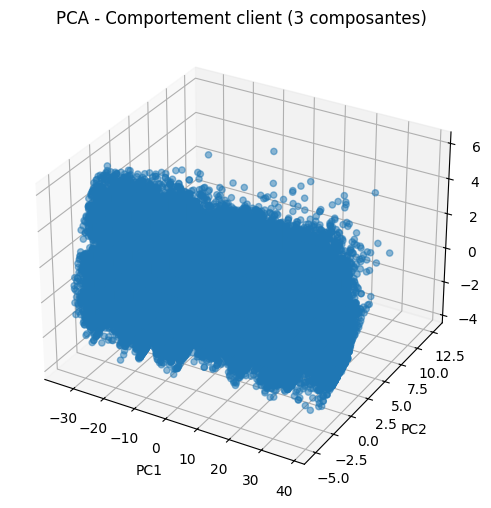

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X : dataframe standardisée (features pour le BO "comportement client")
# Par exemple : X = df_behavior_scaled[features_for_clustering]

# Check for remaining NaNs
print("Missing values before PCA:")
print(X.isnull().sum())

# Drop rows with NaN values for PCA, as imputation might not have covered all cases
X_cleaned = X.dropna()

# Initialisation du PCA
pca = PCA(n_components=3)  # Initialisation du PCA pour 3 composantes

# Application du PCA
X_pca = pca.fit_transform(X_cleaned)

# Vérification des composantes principales
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Transformation en DataFrame pour visualisation
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Visualisation 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Comportement client (3 composantes)')

plt.show()

# Supervised learning problem

# Modeling

# Evaluation

# Deployment

# Unsupervised learning problem

# Modeling

# Evaluation

# Deployment